# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
authorLocalPath = r".\Tennis_Windows_x86_64\Tennis.exe"
env = UnityEnvironment(file_name=authorLocalPath)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 20):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     step_t = 0
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         step_t+=1
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
#     print("Terminal time step: {}".format(step_t))

When finished, you can close the environment.

### 4.Train the Agent

In [6]:
AGENT_PERFORMANCE_BENCHMARK = 0.5
PRINT_EVERY = 100
N_EPISODES = 2000

In [7]:
from maddpg import MADDPG
agents = MADDPG(random_seed=0)

def maddpg(n_episodes=N_EPISODES, print_every=PRINT_EVERY):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agents.reset()
        states = env_info.vector_observations
        eps_scores = np.zeros(num_agents) 
        while True:
            actions = agents.act(states)       # each agent issue an action
            env_info = env.step(actions)[brain_name] # get the environment info
            next_states = env_info.vector_observations       # get the next state
            rewards = env_info.rewards                       # get the reward
            dones = env_info.local_done                      # get done signal
            transitions = (states,
                           actions,
                           rewards,
                           next_states,
                           dones)
            agents.step(transitions)
            states = next_states                             # current state
            eps_scores += rewards                       # update current scores (take the max out of the two)
            if np.any(dones):
                break 
        scores_deque.append(np.max(eps_scores))                         # add episode score to queue
        scores.append(np.max(eps_scores))                               # add episode score to tracker
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:                   # print average score once every k
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        # Indent/Unindent this block if we want to stop once the performance benchmark is achieved
        # Keep as is if the goal is to get as high as performance as we can...
        if np.mean(scores_deque)>=AGENT_PERFORMANCE_BENCHMARK and i_episode >= 100: # stop and save agent params the environment is solved
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-1, np.mean(scores_deque)))
            agents.save_checkpoints()
            break
    return scores

Episode 100	Average Score: 0.02
Episode 200	Average Score: 0.03
Episode 300	Average Score: 0.03
Episode 400	Average Score: 0.04
Episode 500	Average Score: 0.04
Episode 600	Average Score: 0.05
Episode 700	Average Score: 0.06
Episode 800	Average Score: 0.08
Episode 900	Average Score: 0.08
Episode 1000	Average Score: 0.10
Episode 1100	Average Score: 0.13
Episode 1200	Average Score: 0.37
Episode 1225	Average Score: 0.51
Environment solved in 1224 episodes!	Average Score: 0.51

---Training duration: 1:09:07.112045 ---


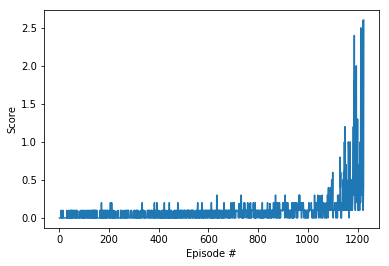

In [8]:
from datetime import datetime
start_time = datetime.now()
scores = maddpg()

print("\n---Training duration: %s ---" % (datetime.now() - start_time))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch the agent play

In [11]:
agents = MADDPG(random_seed=0)
agents.load_checkpoints()


for i in range(10):
    # Set environment to evalulation mode
    env_info = env.reset(train_mode=False)[brain_name]        
    states = env_info.vector_observations
    while True:
        eps_scores = np.zeros(num_agents)
        actions = agents.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations       # get the next state
        rewards = env_info.rewards                       # get the reward
        dones = env_info.local_done                     # get done signal
        states = next_states                             # current state
        eps_scores += rewards 
        if np.any(dones):
            print("Agent max score: {}".format(np.max(eps_scores)))
            break 


Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
Agent max score: 0.0
